## Where does data come from?

In the example above, we demonstrated some code that generates fake data $X$ and $Y$. On the other hand, real data comes from the real world, not from some python code. For every dataset, there is an immensely complex network of causal interactions that ultimately "produces" the data. 

For example, in our blood pressure example, a patient's pre-treatment vital signs are caused by their physiological state: their genetics, life history, what they ate for breakfast that morning, whether or not they just ran up a flight of stairs, and so on and so forth. Taking a drug influences the levels of certain chemicals in the blood, which are taken up at particular rates in certain organs by certain enzymes, the levels of which are impacted by the patient's genetics and prior physiological state, which was influenced by their life history, etc. Thus the impact of the drug on cellular processes is mediated by these factors. The cells respond by increasing or decreasing their production of some proteins or metabolites, which, in combination with the immediate condition of the patient when the measurement is taken, determines the post-treatment blood pressure. 

Or, let's say we're trying to determine whether or not there is a cat in a photograph. The cat being in front of the camera when the photo was taken ($y_i$) could be caused by a huge number of factors, and the values of the pixels in the photograph ($x_i$) are caused by the reflection of photons emitted from sources of light off the cat (and other objects) and the mechanics of the detection of light inside the camera.

In a nutshell, the world is complicated. There is no way that mere mortals could ever write code accurate enough to perfectly simulate the exact processes that produce data about complex real-world phenomena.

But, despite the complexity, you should start thinking about that complex web of causality as "code" that's being run in some cosmic simulation. Maybe you can imagine that there are "data gods" that write and are running this code. We'll never see their code, and we'll never be able to understand it, but somewhere, out there, that metaphysical code is running, and it's generating the observations that we see in our data.

You can think of that code as a little "factory" that pumps out observations of $x_i$ and $y_i$, one at a time. The factory is behind a curtain that we can't ever look behind, but we can see the pile of $x_i$s and $y_i$s that come out of it, which are our $X$ and $Y$.

![](factory.png)

If we had that code, we'd be able to reverse engineer it to find the most likely value of $y_i$ given $x_i$ as accurately as would be possible with those predictors. In practice, however, we can only build a *model* of that code. Our model will never capture the complexities of reality, the same way that a model plane doesn't even begin to approach the complexity of a real aircraft. But, ideally, it will be similar enough in ways that are important for the task at hand: if we're using a model plane just to demonstrate what an aircraft might look like, we don't need the model to have functioning jet engines. And if all we need to do is estimate $y_i$ for a new $x_i$, we don't exactly need to understand the complex web of causality linking the two together.

We do, however, need a way to talk about the relationship that $x_i$ and $y_i$ might have. And to do that, we need a way to talk abstractly about the "code" or "data factory" that's behind the curtain, the same way we developed abstract terms to describe our data. Thankfully, the language of probability works perfectly for that.

## Random variables are factories that generate data

The data factories we're interested in are the kind that output $x_i$s and $y_i$s, but to understand how these factories work it's better to consider a simpler factory that produces one number at a time, instead of one vector $x_i$ and one number $y_i$. 

We'll call our factory $\mathbf Z$. This factory pushes out one value $z_i$ at a time. Furthermore, let's say that half the time you get a $1$ and half the time you get a $0$; those are the only values that the $\mathbf Z$ factory can produce. And the factory is built to reset itself between producing each value, so whatever $z_i$ is has no impact on $z_{i+1}$.

In the language of probability theory, $z_i$ are **realizations** from $\mathbf Z$, which has a **distribution**:

$$
\begin{array}{rcl}
P(\mathbf Z = 0) &=& 1/2 \\ 
P(\mathbf Z = 1) &=& 1/2
\end{array}
\quad \quad \text{or} \quad \quad
P(\mathbf Z=z) =
\begin{cases}
1/2 & \text{for }z=0 \\
1/2 & \text{for }z=1
\end{cases}
$$

What we've been loosely calling a "factory" is a **random variable** in the language of probability theory. But that's just a name. You can keep thinking of them as factories, or code, that generate data.

<div class="alert alert-block alert-warning">
<b>Note:</b> 
Random variables are often written in uppercase, (e.g. Z) and their realizations in lowercase (z). We're going to be using uppercase for matrices (and sets), so I'm going to use boldface in conjunction with uppercase ($\mathbf Z$) to denote random variables.
</div>

Ok, so if the random variable is a factory, and the realizations of the random variable are the output of that factory (the data we get to see), then how do we read a statement like $P(\mathbf Z = 0) = 1/2$? Well, that just means that the value $z$ that $\mathbf Z$ produces is $0$ half of the time. But what exactly do we mean by "half the time"? While we usually don't have to think deeper than this, you'll see later that it is sometimes necessary to have a more rigorous definition of probability.

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Remember that the entire purpose of talking about these factories is so that we can imagine what's behind the curtain, producing the data that we observe. Think of a real-world scenario where we could pretend that the data we observe was generated by $\mathbf Z$. In other words, what's something we could measure in the real world that we might model using $\bf Z$?
    
</div>

Let's build that definition. We'll start with some raw materials. All factories have raw materials that go into them, which end up being turned into the finished product. In a similar way, random variables have inputs which get mapped to realized values. We'll call them "data ore": the unrefined precursor that gets transformed by our factory (random variable $\mathbf Z$) into the data product $z$. The data ore exists in units (data ore nuggets). The factory takes one nugget at a time and transforms it into a realization.

The nuggets are kept in an big silo called $\Omega$ before they go to $\mathbf Z$. This silo is filled to the brim with *all* of the possible nuggets that could be fed into the factory, one of each of them. It's also a magic silo, so when you take out a nugget, another one exactly like it is mined out of the depths of the cosmos to take its place in the silo.

![](factory_rv.png)

Each nugget is gets transformed into a value of $z$, but the process isn't random. For instance, if a nugget named "Karl" turned into a 1 when fed through $\mathbf Z$, then we would *always* get a 1 when Karl goes into $\mathbf Z$. But we know that sometimes $\mathbf Z$ produces 0s, so there must be other nuggets whose destiny is to become 0s, just like Karl's destiny is to be a 1. The "randomness" in $\mathbf Z$ isn't caused by what's in the factory, it's caused by randomly picking a nugget to throw into it.

We can even code up our little example, imagining that we have 10 nuggets, boringly named "0", "1", "2"... "9":

In [5]:
def Z(ω): # factory (random variable)
    if ω in set([1,4,5,8,9]): # these are the outcomes (nuggets) that map to the value 1 
        return 1
    if ω in set([0,2,3,6,7]): # these are the outcomes (nuggets) that map to the value 0 
        return 0
Z.Ω = set([0,1,2,3,4,5,6,7,8,9]) # sample space (silo) of outcomes (ore nuggets) attached to Z
    
import random
def realize(rand_var): # run the assembly line!
    ω = random.sample(rand_var.Ω, 1)[0] # grab a single nugget out of the silo at random
    return rand_var(ω) # push it through the factory

<div class="alert alert-block alert-warning">
<b>Python Tip:</b> 
   
`random.sample(x,n)` grabs `n` values at random out of the set `x` and returns them as a list.
</div>

Here are 20 observations $z=[z_1, z_2, \dots z_{20}]$, fresh off the assembly line of the $\mathbf Z$ factory:

In [6]:
z = [realize(Z) for i in range(20)] 
z

[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]

Now we're ready to define probability: the probability of an realization (a particular value $z$) is just the proportion of the silo that's taken up by nuggets that are destined to become that value $z$ when fed through $\mathbf Z$. That's it. We denote that proportion with the notation $P(\mathbf Z = z)$. In our example above, saying $P(\mathbf Z = 1) = 1/2$ means that half of all the possible nuggets that could go into $\mathbf Z$ would produce a 1.

That's a definition we can code up:

In [7]:
def P(rand_var, realization):
    A = set(ω for ω in rand_var.Ω if rand_var(ω) in realization) # what are all the nuggets that map to the value(s) in question?
    return len(A)/len(rand_var.Ω) # what is the "volume" of those nuggets relative to the volume of the silo Ω?

In [8]:
P(Z,[0]), P(Z,[1]) # P(z=0), P(z=1)

(0.5, 0.5)

So to build a factory that makes 0s and 1s in even proportions, all I had to do was evenly split up the number of nuggets that are destined to produce each value. It also doesn't matter what I call the nuggets. For example, here is equally good code to implement $\mathbf Z$:

In [9]:
def Z(ω): # factory (random variable)
    if ω in set([-1234]): # these are the outcomes (nuggets) that map to the value 1 
        return 1
    if ω in set([980123]): # these are the outcomes (nuggets) that map to the value 0 
        return 0
Z.Ω = set([980123, -1234]) # sample space (silo) of outcomes (ore nuggets) attached to Z

[realize(Z) for i in range(20)] 

[0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Write code for a new random variable $\mathbf W$ that behaves like this:
    
$$
P(\mathbf W=w) =
\begin{cases}
0.1 \dots  & \text{for }w=-1 \\
0.4 \dots & \text{for }w=0 \\
0.2 & \text{for }w=1 \\
0.3 & \text{for }w=2
\end{cases}
$$
    
You'll need to make your own nugget silo `Ω` and define the function `W(ω)`. Test it out using the `realize()` and `P()` functions we wrote. Use `P()` to calculate $P(\mathbf W =0)$.
    
</div>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTCXQ098kIFldwWw8VEPSR_q9Tbk1BFjuhFH8V8NVPskxrtVj7&s)

If you're looking at this and thinking that I can't possibly be serious, that the foundations of statistics and machine learning can't possibly be built up from imagining data factories and magical silos... well, you're wrong. Sure, I've concocted a somewhat elaborate metaphor, but it's a metaphor that accurately describes how these otherwise very abstract concepts relate to each other. If you can look at something like $P(\mathbf Z = z) := \mathbb P(\{\omega \in \Omega \vert \mathbf Z(w)=z\})$ and immediately come away with an understanding of what that means, all the more power to you. But I don't. At least not without first building up an intuition for each of the components.

In probability theory, the silo $\Omega$ is called a **sample space** and the data ore nuggets $\omega$ are called **outcomes** (not to be confused with what we call the variable we want to predict in machine learning). A random variable $\mathbf Z$ is defined as a function that maps an element $\omega$ of $\Omega$ to a realization $z$. The probability of a realization $z$ is the **measure** (volume, or proportion of total volume) of the set of outcomes (data ore nuggets) that map to $z$ (are destined to be transformed to $z$ by $\mathbf Z$). 

![](prob_preimage.png)

When I talk about these things outside of the context of explaining them, I do call them by their real names (e.g. random variable, sample space, etc.) because that's what people have called them for nearly a century. But when I close my eyes and *reason* about these concepts, I'm thinking about something tangible, like a factory. As we go on I'm going to introduce more mathematical notation as we need it, and I'm going to wean off the factory metaphor, but I encourage you to keep building your intuition about these concepts instead of thinking about them as abstract symbols on a page. The symbols are just a convenient shorthand for the ideas. The only reason to know the standard names and symbols is to be able to read and understand what others have written. If you find yourself skimming over an equation- stop. Read it slowly and think about what each part means.

So now that we're here, let's demystify the notation in that equation I dropped up above! Here it is again:

$$P(\mathbf Z = z) := \mathbb P(\{\omega \in \Omega \vert \mathbf Z(w)=z\})$$

To start, the $:=$ means "the thing on the left is defined as the thing on the right". So we're saying that when we write "$P(\mathbf Z = z)$", we really mean whatever "$\mathbb P(\{\omega \in \Omega \vert \mathbf Z(\omega)=z\})$" is. Ok, next up is [set-builder notation](https://www.mathsisfun.com/sets/set-builder-notation.html): you can read $\{a\in A | f(a) = 1\}$ as "the collection of all the elements $a$ in the set $A$ *such that* $f(a)=1$". So $\{\omega \in \Omega \vert \mathbf Z(\omega)=z\}$ is the set of outcomes $\omega$ that become $z$ when passed through the random variable $\mathbf Z$. There may be many such outcomes, or just one, or none, so the set can be big, small, or nonexistent. We will write the name of that set a little more compactly using the notation $\mathbf Z^{-1}(z) = \{\omega \in \Omega \vert \mathbf Z(w)=z\}$ since usually $f^{-1}(y)$ denotes the element $x$ such that $f(x)=y$. We call this the **preimage** of $z$ under $\mathbf Z$.

<div class="alert alert-block alert-warning">
<b>Note:</b> 
   
Preimages aren't just for random variables- you can define preimages for any function. If the function is $y=f(x)$, the preimage of a set $A$ (denoted $f^{-1}(A)$) is a set of all of the values $x$ that become one of the $y$ values in $A$ when shoved through $f$. The set $A$ is called the image of $f^{-1}(A)$ under $f$.
    
For example, if $f(x) = x^2$ and $A$ is the set of numbers between 0 and 4, then $f^{-1}(A)$ is the set of numbers between -2 and 2, since every number between -2 and 2, when squared, is between 0 and 4, and these are the only numbers for which that is the case. Another example: if $f(x) = \cos(x)$ and $A=\{1\}$, then $f^{-1}(A) = \{\dots, -4\pi, -2\pi, 0, 2\pi, 4\pi, 6\pi, \dots\}$. Plot or draw a picture of $\cos(x)$ and mark the points where $\cos(x) = 1$ to see why.
    
</div>

Finally, we have $\mathbb P()$, which is the [probability measure](https://en.wikipedia.org/wiki/Probability_measure). We won't define this super rigorously, but think of it as a function that measures the proportion of all of the outcomes in $\Omega$ that are contained in the subset $\mathbf Z^{-1}(z)$. This is basically the volume of space that the nuggets in $\mathbf Z^{-1}(z)$ take up in the silo $\Omega$. By convention, we say that $\Omega$ has volume 1 so that the volume of $\mathbf Z^{-1}(z)$ is also the proportion of volume that $\mathbf Z^{-1}(z)$ takes up in $\Omega$. In the figure above, that's represented by the area of the shaded gray region.


If you put all of that together, you'll see that it's exactly the same as the definition we put together using our factory analogy. 

We can also talk about the probability of sets of realizations instead of just single realization $z$. For instance, what's the probability that $z$ is 0 *or* 1? We write that like $P(\mathbf Z \in A)$, where $A$ is the set of possible realizations, like $\{0,1\}$. That's more general than the probability of a single realization $z$: $P(\mathbf Z = z)$. The definition is the same though: $P(\mathbf Z \in A) := \mathbb P(\mathbf Z^{-1}(A))$. All we need to do is count up the volume of all the nugets that produce any of the values that are in $A$, instead of just the nuggets that produce $z$.

<div class="alert alert-block alert-warning">
<b>REMEMBER:</b> 

If your eyes glaze over every time you see mathematical notation, don't worry. Remember, that's normal. Just slow down and read it again. Try and think about what it <i>means</i>.
</div>

Ok- I promised that it would be useful to define probability in a more rigorous way than "$z$ happens $x$% of the time". Now we're going to see why. 

To start with, let's "derive" a relatively simple fact: for any subset of possible realizations $A$, $P(\mathbf Z \in A) \in [0,1]$. This is a compact way of writing that for any subset of realizations, the volume of the subset of outcomes $\mathbf Z^{-1}(A)$ that map to those realzations is a number between 0 and 1. Why? Well, if the volume of our silo $\Omega$ is 1, the volume of any subset of that has to be less than or equal to 1. And there is no subset that can occupy negative space, so the volume has to be greater than or equal to 0.

Here's a trickier one: if two sets of realizations $A$ and $B$ have no realizations in common, then the probability of a realization from either of them is the sum of the probabilities of a realization from each of them. Mathematically:

$$A \cap B = 0 \rightarrow P(\mathbf Z \in A \cup B) = P(\mathbf Z \in A) + P(\mathbf Z \in B)$$

$A \cap B$ is read as "the intersection of the sets $A$ and $B$", which is the set of elements that are in both sets. It's the middle part of a Venn diagram. $A \cup B$ is read  as "the union of $A$ and $B$", which is all of the elements in either set- that's the entirety of the Venn diagram. 

That also seems cryptic until you think about it in terms of quantities of ore nuggets that produce certain values when fed through the factory. If you take all the ore nuggets that end up becoming any of the values in $A$ (call that set of nuggets $\mathbf Z^{-1}(A)$), and all the nuggets that end up becoming values in $B$ (call that $\mathbf Z^{-1}(B)$), then the total volume that end up becoming values in either $A$ or $B$ is the sum of the volumes that become $A$ and those that become $B$. This is true as long as there are no nuggets that become both a realization in $A$ and a realization in $B$ because we would double-count these. But we've also ensured that these do not exist since each nugget is destined to become only a single value, and we made sure that there is no overlap between $A$ and $B$.

If there is overlap, the proposition doesn't hold. For instance, if $A= \{0,1\}$ and $B = \{0\}$, every element of $B$ is also an element of $A$, so the volume of $Z^{-1}(A \cup B)$ is the volume of $Z^{-1}(A)$, which is not the volume of $Z^{-1}(A)$ plus the volume of $Z^{-1}(B)$.

We can even use our code from before to demonstrate this:

In [10]:
A = set([0])
B = set([1])
P(Z,A) + P(Z,B) == P(Z,A|B) # in python, set union ∪ is written | because an element is in A∪B if it is in A OR B (A|B)

True

In [11]:
A = set([0,1])
B = set([0])
P(Z,A) + P(Z,B) == P(Z,A|B)

False

<div class="alert alert-block alert-warning">
<b>Note:</b> 

This is as pretty much as rigorous as probability theory gets. The only other wrinkle is that when we start talking about random variables that can produce things like continuous values (of which there are an infinite number), technically we need to consider silos that are filled with infinite numbers of nuggets (that still all together occupy a volume of 1!). And, fun fact, it turns out that in this case there are some sets of nuggets that are distributed in such a messed up way within the silo that it is impossible to measure their volume. But they are of no practical importance and probabilists just ignore these sets and say that their probability is not defined (no joke)!
</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Draw a picture based on the figure above that helps explain why $A \cap B = 0 \rightarrow P(\mathbf Z \in A \cup B) = P(\mathbf Z \in A) + P(\mathbf Z \in B)$

</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Let's say the sets $A$ and $B$ have some overlap. Can you come up with a formula to calculate $P(\mathbf Z \in A \cup B)$ given $P(\mathbf Z \in A)$, $P(\mathbf Z \in  B)$, and $P(\mathbf Z \in A \cap B)$?

</div>

## Random variables are described by their probability distributions

As perhaps you've noticed, neither the exact nature of what is in the silo nor which of its elements map to which realizations change the behavior of the random variable as long as the proportions of outcomes mapping to each realization are the same. For example, we looked at two equivalent ways to implement our random variable $\mathbf Z$:

In [12]:
def Z(ω): 
    if ω in set([1,4,5,8,9]): 
        return 1
    if ω in set([0,2,3,6,7]): 
        return 0
Z.Ω = set([0,1,2,3,4,5,6,7,8,9]) 

In [13]:
def Z(ω): 
    if ω in set([-1234]): 
        return 1
    if ω in set([980123]): 
        return 0
Z.Ω = set([980123, -1234]) 

These are technically two different random variables because they have different sample spaces and different mappings to the realizations, but they behave exactly the same, which is the say they have the same probability distribution. The distribution of the random variable is nothing more than $P(\mathbf Z=z)$ as a function of the realization $z$:

$$
P(\mathbf Z=z) =
\begin{cases}
1/2 & \text{for }z=0 \\
1/2 & \text{for }z=1
\end{cases}
$$

The probability distribution describes how the factory should *behave* from the perspective of someone who can only see its products $z_i$: half the time you get a 0, half the time you get a 1. There is no need to mention the silo of ore nuggets, give them names, and specify which nuggets are destined to be 0s and which are destined to be 1s. We know they're back there, and we know what *proportion* are destined to be 0s and 1s (since that's what the probability means), but we don't need the details. In fact, unless you're a probability theorist, you will never need to think about the sample space to solve a problem. The only reason you need to know about it is so that you can understand useful identities, which we will continue to derive as we go along.

The probability distribution can be thought of as a function of the factory product $z$. For each value of $z$, it tells us the total volume of the nuggets in the silo that map to that outcome. We can visualize that by sorting all the nuggets in the silo into piles according to which value they are destined to become. The relative heights of each pile are proportional to the volume of space that each group of nuggets take up in the silo. Let's demonstrate with a new random variable $\bf V$:

In [14]:
def V(ω): 
    if ω in set([1]): 
        return 2
    if ω in set([2,3]): 
        return 0
    if ω in set([4,5,6]): 
        return -1
    if ω in set([7,8,9,0]):
        return 1
V.Ω = set(range(10)) 

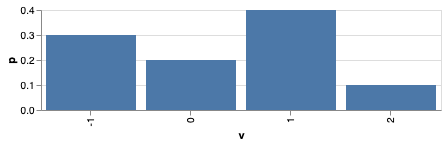

In [15]:
vs = [-1,0,1,2] # all the values v can take
ps = [P(V,[v]) for v in vs] # calculate the probability of each
import altair as alt # for plotting
import pandas as pd # to make dataframes

distribution = pd.DataFrame({'v':vs, 'p':ps})
alt.Chart(distribution, height=100, width=400).mark_bar().encode(x='v:O', y='p')

<div class="alert alert-block alert-warning">
<b>Python Tip:</b> 

`altair` is a useful python package for visualization. It's optimized to work with dataframes from the `pandas` package. Feel free to browse the documentation for these packages, but you don't need to be an expert to continue on in this book.
</div>

This is the graphical representation of the probability distribution

$$
P(\mathbf V=v) 
= 
\phi(v) 
= 
\begin{cases}
0.3 & \text{for }v=-1 \\
0.2 & \text{for }v=0 \\
0.4 & \text{for }v=1 \\
0.1 & \text{for }v=2
\end{cases}
$$

$\phi(v)$ is called a **probability mass function**. If we have multiple random variables floating around and we want to distinguish their mass functions, we'll sometimes write $\phi_{\mathbf V}(v)$.

If we want to know the probability of a particular set of realizations, say, $P(\mathbf V \in \{0,1\})$, it's easy to get using the mass function:

$$P(\mathbf V \in A) = \sum_{v \in A} \phi(v)$$

We simply sum up the probabilities that $\mathbf V$ is any of the realizations within the set $A$ of interest. This is possible because of the identiy we established in the previous section (see exercise below). The upshot is that we don't have to talk about $\Omega$ anymore. All of the information we need to calculate any probabilities of $\mathbf V$ is baked into the mass function $\phi(v)$.

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

We showed before that $A \cap B = 0 \rightarrow P(\mathbf Z \in A \cup B) = P(\mathbf Z \in A) + P(\mathbf Z \in B)$. Given that $\phi(v) = P(\mathbf V= v) = P(\mathbf V \in \{v\})$, how does this fact imply that $P(\mathbf V \in C) = \sum_{v \in C} \phi(v)$?

</div>

### Continuous random variables and densities

So far, all the random variables we've talked about have produced outputs from a finite, discrete set (e.g. $\{0,1\}$ or $\{-1,0,1,2\}$). If we're imagining a the factory that might produce the data we observe when flipping a coin, a binary output is all we need. Similarly, if we want to imagine the factory that assigns an "apple", "orange", or "banana" label to a photograph of a fruit, it just needs to output a discrete set of three values. But if we want to imagine the kind of factory that could produce the prices of different apartments in New York, we need something that can output a continuous range of values.

Let's think up a random variable (call it $\bf Z$ again) that can take any value between 0 and 10. How many numbers are there between 0 and 10? Well, an infinite number: for any two numbers in that interval, you can find a number that's right between them. Since one nugget from the silo always prodcues the same realization when pushed through the factory, there need to be an infinite number of nuggets in the silo to be able to produce an infinite number of realizations. That means that our old code, where we manually enumerated all of the elements in $\Omega$, is not going to work anymore. What we can do instead is imagine that $\Omega$ is itself an interval, like all the numbers between 0 and 1. So, to pick a random nugget to throw into the factory, we just pick a random number between 0 and 1. Here's an example:

In [16]:
def Z(ω): 
    return 10*(ω**2) # when ω goes into the factory, the factory makes ω^2
Z.Ω = random.random # returns a single number between 0 and 1 when called

def realize_cont(rand_var): # run the assembly line!
    ω = Z.Ω() # returns a single number between 0 and 1
    return rand_var(ω) # push it through the factory

In [17]:
[realize_cont(Z) for i in range(5)]

[8.777516139713441,
 1.0921042048856564,
 1.2294991425273554,
 0.008935462763956431,
 0.021889032757063595]

So $\mathbf Z$ is defined by $\mathbf Z(\omega) = 10\omega^2$ with $\omega \in [0,1]$. Great. But now what does $P(\mathbf Z = z)$ mean? We just apply the same old definition of probability: it's the proportion of nuggets in the silo that are destined to become the value $z$. For the random variable $\bf Z$ we've defined above, how many nuggets become the value $2.5$? $\mathbf Z$ transforms outcomes $\omega$ into realizations $z$ by applying the function $z=10\omega^2$, so the answer is just one: $\omega = \sqrt{2.5/10} = 0.5$. Any other value of $\omega$ would produce a different value of $z$.

<div class="alert alert-block alert-warning">
<b>Note:</b> 

Notation like $[a,b]$ is often used to concisely write intervals- this just means "all the numbers between $a$ and $b$, including those endpoints". We use parentheses like $(a,b)$ to indicate that the endpoints should not be included. $(a,b]$ and $[a,b)$ have one of the two endpoints included, with the bracket indicating the endpoint that's included and the parenthesis indicating which isn't.
</div>

Thus to know $P(\mathbf Z = 0.75)$ what we need to know is how much "volume" a single point ($\omega = 0.5$) takes up within the interval $[0,1]$. The answer, which may not surprise you, is 0. If you want a rigorous argument for why that's the case, you have to pick up a real analysis or measure theory textbook. The implication is that for any (strictly) continuously-valued random variable, the probability of it taking any given value in particular is zero: $P(\mathbf Z = z) = 0$, no matter what $z$ is. 

Well, that kind of sucks. It would be great if we had some kind of function that would just tell us what the probability of different subsets of realizations is, like we have in the discrete case with the probability mass function: $P(\mathbf V \in A) = \sum_{v \in A} \phi(v) = \sum_{v \in A} P(\mathbf V = v)$. It was easy to do that for discrete random variables, but if we try to do the same for continuous random variables, this is what we get: 

$$\sum_{z \in A} P(\mathbf Z = z) = \sum_{z \in A} 0 = 0$$

We get 0 no matter what set $A$ we choose. But that's ridiculous- values do come out of the factory, so there must be some proportion of nuggets in the silo that correspond to subsets of those values. Furthermore, this formula doesn't even make sense unless the set of realizations is discrete and we can sum over them. But what if we want to know the probability that $\mathbf Z$ is between 4 and 5? There is a continuous infinity of numbers between 4 and 5, so we can't sum over all of them discretely. And even if we could, $P(\mathbf Z = z)$ would be zero for all of them, so the answser would still be zero no matter what. We need a different tool.

Let's go back to our example and work forward from the definition of the sample space and $\mathbf Z$. What's the probability that the realization $z$ is between two values $a$ and $b$? For instance, what's $P(\mathbf Z \in [2.5,9])$? Looking at the transformation $z = 10\omega^2$, you can see that only values of $\omega$ between $0.5$ and $0.3$ produce values between $2.5$ and $9$. In other words, $\mathbf Z^{-1}([2.5,9]) = [0.3,0.5]$. The proportion of volume that the interval $[0.3, 0.5]$ takes up within the interval $[0,1]$ is is the length of the interval $[0.3, 0.5]$ (which is $0.2$) as a proportion of the length of the interval $[0,1]$ (which is 1). So $P(\mathbf Z \in [2.5,9]) = 0.2$!

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Let $\mathbf Z$ be as it is above. Find a formula for $P(\mathbf Z \in [a,b])$ for any values $a \le b$ and $a,b \in [0,10]$.

</div>

Mission accomplished? Not quite. We managed to calculate a probability given the sample space and random variable, but what we want is some kind of function that we can manipulate to calculate these probabilities without reference to the sample space at all. We don't want to have to think about what $\Omega$ is or exactly how the different outcomes map to the different realizations.

So here's an idea: let's bin $z$ into 10 non-overlapping buckets, like $[0,1)$, $[1,2)$ ... $[9,10]$ and calculate the probability within each of those buckets. This is just like what we did in the discrete case. We're sorting all of the nuggets in the silo into different piles depending which set of values they are destined to become, and then measuring the volume of each pile. Here's what we get when we do that for the example random variable $\bf z$ defined in the code above:

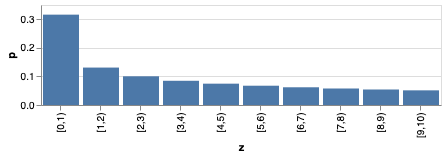

In [18]:
from math import sqrt

def Pz(a,b):
    return sqrt(b/10) - sqrt(a/10)

zs = range(10)
ps = [Pz(z,z+1) for z in zs]
zs_labels = [f'[{z},{z+1})' for z in zs]

distribution = pd.DataFrame({'z':zs_labels, 'p':ps})
alt.Chart(distribution, height=100, width=400).mark_bar().encode(x='z:O', y='p')

And why stop at 10 buckets? Let's split it up into 100.

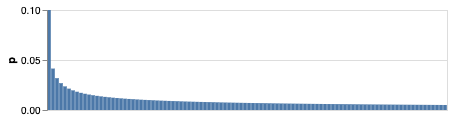

In [19]:
zs = np.arange(0,10,0.1)
ps = [Pz(z,z+0.1) for z in zs]
zs_labels = [f'[{z},{z+0.1})' for z in zs]

distribution = pd.DataFrame({'z':zs_labels, 'p':ps})
alt.Chart(distribution, height=100, width=400).mark_bar().encode(alt.X('z:O',axis=None), y='p')

More buckets gives us more information. If we want to know $P(\mathbf Z \in [0,0.5))$, for instance, we can sum up the probabilities for the buckets $[0,0.1)$, $[0.1,0.2)$, ... $[0.4,0.5)$. But we can't get *any* probability. The graph doesn't have enough information to let us calculate probabilities over intervals whose ends are between two cutpoints of the buckets. It only has resolution up to increments of $0.1$ in terms of $z$. It would be nice to have a graph that lets us read off arbitrary probabilities like $P(\mathbf Z \in [a,b])$ just by looking at how much "stuff" there is between $a$ and $b$. Something like this:

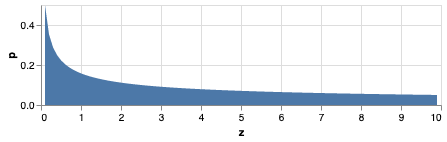

In [20]:
z = np.arange(0.1,10,0.1)
p = 1/(2*np.sqrt(10*z)) # magic, for now...

distribution = pd.DataFrame({'z':z, 'p':p})
alt.Chart(distribution, height=100, width=400).mark_area().encode(x='z', y='p')

Before I explain how I managed to make this graph, which is called a **density plot**, I want to establish an intuition for what it means. We've gone from 10 buckets, to 100 buckets, to "infinite" buckets. I like to think of these pictures literally: all the outcomes $\omega$ neatly piled up on top of the labels $z$ for the values they will become. So to get $P(\mathbf Z \in [a,b])$ from this picture, which is just the volume of outcomes that map to values between $a$ and $b$, all we need to do is see how much stuff there is piled up between $a$ and $b$ in the picture. 

![](https://media.giphy.com/media/xT0xeJpnrWC4XWblEk/giphy-facebook_s.jpg)

To do this, we turn to a useful tool from calculus: the integral. To make the picture above, we need a curve $\phi(z)$ such that the area under $f$ between $a$ and $b$ is $P(\mathbf Z \in [a,b])$ for all values $a$ and $b$. In the previous exercise you should have figured out that $P(\mathbf Z \in [a,b]) = \sqrt{\frac{b}{10}} - \sqrt{\frac{a}{10}}$. So what we need is the curve $\phi(z)$ that satisfies this equation:

$$\int_a^b \phi(z) dz = P(\mathbf Z \in [a,b]) = \sqrt{\frac{b}{10}} - \sqrt{\frac{a}{10}}$$

Looking at the integral equation, it's clear that $\Phi(z) = \sqrt{\frac{z}{10}}$ is the antiderivative of $\phi(z)$, so all we need to do to get $\phi$ is differentiate $\Phi$:

$$\phi(z) = \frac{d\Phi(z)}{dz} = \frac{d}{dz} \sqrt{\frac{z}{10}} = \frac{1}{2\sqrt{10z}}$$

<div class="alert alert-block alert-warning">
<b>Note:</b> 

If this doesn't make any sense to you, you should stop and go review a friendly calculus book or any of the great online resources on the topic.
</div>

That's why we have `ps = [1/(2*sqrt(10*z)) for z in zs]` in the code above.

The function $\phi(z)$ is called a **probability density function** (PDF), which is the continuous equivalent of the probability mass function. Its integral $\Phi(z) = \int_{-\infty}^z \phi(t)dt = P(\mathbf Z \le z)$ is called a **cumulative density function** (CDF). Either of these functions tell you everything you need to know about probabilities of the random variable $\mathbf Z$. The probability that $\mathbf Z$ takes any of the values in an arbitrary set $A$ is 

$$P(\mathbf Z \in A) = \int_{A} \phi(z) dz$$

This works the same way as the probability mass function for a discrete random variable $\mathbf V$:

$$P(\mathbf V \in A) = \sum_{v \in A} \phi(v)$$

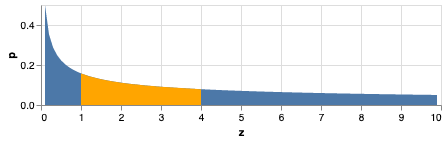

In [21]:
A = (1<=z) & (z<=4)
distribution = pd.DataFrame({'z':z, 'p':p, 'A':A})
alt.Chart(distribution, height=100, width=400).mark_area().encode(
    x='z',
    y='p'
) + alt.Chart(distribution.query('A')).mark_area(color='orange').encode(
    x='z',
    y='p'
)

For example, the probability that $\mathbf Z$ is in the set $[1,4]$ is the area shaded in orange above.

<div class="alert alert-block alert-warning">
<b>Note:</b> 

The notation $\int_{A} \phi(z) dz$ just means $\int_{-\infty}^\infty I_A(z)\phi(z) dz$ where the <b>indicator function</b> $I_A(z)$ is 1 if $z\in A$ and 0 else. In othe words, all we're doing is summing up the $\phi(x)dx$s where $x \in A$. That's analogous to summing up the $\phi(v)$s where $v \in A$ in the discrete case.

</div>

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

For our random variable $\mathbf Z$ with density $\phi(z) =\frac{1}{2\sqrt{10z}}$, what is $P(\mathbf Z \in [0, 10])$? Calculate the probability by integrating the density function. Does your answer line up with what you expect based on our original definition of $\mathbf Z$? 
    
Here is another random variable that, like $\mathbf Z$, maps outcomes in $\Omega = [0,1]$ to values in $[0,10]$: $\mathbf W(\omega) = 10\omega$. Calculate $P(\mathbf W \in [a,b])$ for some interval $[a,b]$. What is the probability density function for $\mathbf W$? What is $P(\mathbf W \in [0, 10])$?
    
For <i>any</i> continuous random variable $\mathbf X$, what is $\int_{-\infty}^{\infty} \phi(x) dx$ (<i>hint</i>: what probability does this represent)? What is $\Phi(-\infty)$? $\Phi(\infty)$? 
    
Is it possible to have a random variable $\mathbf Q$ with $\phi_{\mathbf Q}(q) < 0$ for some $q$ that is a possible realization of $\mathbf Q$? Why does this not make sense?
    
For two values $a < b$, is it possible that $\Phi(a) > \Phi(b)$? Why nor why not?
    
</div>

At this point, talking about the outcomes $\omega$ is kind of silly. If two random variables have the same probability mass function or the same probability density function, then, for all intents and purposes, they are the same random variable. It doens't matter exactly which outcomes map to which values, as long as the proportions are the same. We already demonstrated this in the discrete case.

To show the same concept for continuous random variables, here is a new random variable $\mathbf Z'$ whose sample space $\Omega$ is $[-100, 100]$ instead of $[0,1]$, but which has the same probability density function as our other random variable $\mathbf Z$: 

$$
\mathbf Z'(\omega) = 10\left(\frac{\omega+100}{200}\right)^2
$$

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Prove to yourself that $\mathbf Z'$ has the same probability density function as $\mathbf Z$.
    
</div>

For this we use the notation $\mathbf Z \sim \mathbf Z'$. Technically they are not the same since the sample spaces are different, so we shouldn't write $\mathbf Z = \mathbf Z'$. But as far as an observer who is outside the curtain is concerned, there is no way to tell them apart. The *distribution* of the random variable is what really matters. 

I think about mass or density functions as convenient abstraction layers between me and the random variable. If I want to know a probability, I don't have to go to the random variable and count up the volume of something in the sample space, I just "query" the mass or density. The "query engine" happens to be an integral or sum, and the query itself is the region of space that I want to integrate over. In a nutshell:

$$
\mathbb P(\mathbf Z^{-1}(A)) = \int_A \phi_{\mathbf Z}(z) dz
\quad
\text{or}
\quad
\mathbb P(\mathbf Z^{-1}(A)) = \sum_{z \in A} \phi_{\mathbf Z}(z)
$$

So if we have $\phi_Z$, we don't need to worry about figuring out what $\mathbf Z^{-1}(A)$ is or how to do the measurement of that set using $\mathbb P$. Finding preimages and measuring them is hard. Integrating and summing are easier.


### Histograms vs. mass and density functions

Many of you are probably already familiar with histograms. Histograms are a way of visualizing observed data. Each observed value is stacked up on top of its approximate label (e.g. any $z$ between 0.5 and 1.5 is labeled "1") and the counts are plotted:

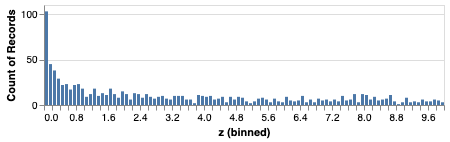

In [22]:
z = [realize_cont(Z) for i in range(1000)] # 1000 draws from Z

plot_df = pd.DataFrame({'z':z})
alt.Chart(plot_df, height=100, width=400).mark_bar().encode(
    alt.X('z', bin=alt.Bin(maxbins=100)),
    y='count()'
)

That looks suspicously like our bucketed density plot:

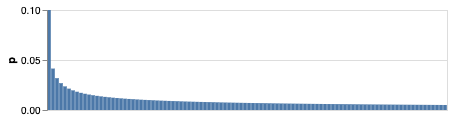

In [23]:
zs = np.arange(0,10,0.1)
ps = [Pz(z,z+0.1) for z in zs]
zs_labels = [f'[{z},{z+0.1})' for z in zs]

distribution = pd.DataFrame({'z':zs_labels, 'p':ps})
alt.Chart(distribution, height=100, width=400).mark_bar().encode(alt.X('z:O',axis=None), y='p')

So what's the difference? Think about what it is we're "stacking up" in the bars. In the histogram, we're sorting and stacking up a *finite number* $n$ of *observed values* $z_i$ according to what they are. In the density plot, we're sorting and stacking up *all* of the *outcomes* $\omega$ in the silo according to the values they are destined to become, and we're measuring their relative volume, not absolute counts.

In a nutshell, the histogram is what we can actually observe, given outputs from the factory. But the density descibes the inner workings of the factory itself, which we can never actually observe.

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

What do you expect to happen to the shape of the histogram above as the number of observations is increased from $1000$ to larger and larger numbers? Can you provide an intuitive explanation for why this happens?
    
</div>

### Common Distributions

We've seen that, for all practical purposes, a random variable is determined by its probability distribution (mass or density function). In reality, the distribution of any particular measurement (e.g. blood pressure) is unknown- it depends on a complex web of causal factors. The true density function is almost certainly so complex it's not even something that we could write down. But, for the purposes of *modeling* that measurement, we *pretend* that the density is something we can write down. 

Over the centuries, people have come up with a lot of distributions that are useful as models across various scenarios. Here are a few of them:

#### Bernoulli distribution

Let's say we're interested in modeling the result of a coin flip. The actual value (heads/tails, which we code as 0/1) of the coin flip is determined by some insanely complicated physics, but we're going to pretend that the value comes out of a little factory called $\mathbf Z$ that has the following probability mass function:


$$
P(\mathbf Z=z) =
\begin{cases}
1/2 & \text{for }z=0 \\
1/2 & \text{for }z=1
\end{cases}
$$

If we want to model a biased coin that comes up heads $(p\times100)$% of the time, we can use a mass function like:

$$
P(\mathbf Z=z) =
\begin{cases}
p & \text{for }z=0 \\
1-p & \text{for }z=1
\end{cases}
$$

This is often written as $\mathbf Z \sim \text{Bernoulli}(p)$ (read: "$\mathbf Z$ is Bernoulli-distributed"). The number $p$ is said to be a **parameter** of the Bernoulli distribution. It would be more accurate to say that a random variable is distributed as a **member** of the Bernoulli **family** of distributions, since, technically, every different value of $p$ encodes a different distribution, or factory, for making data.

Another way to think about it is that there's one data factory, but it has a control panel with a knob labeled "$p$". If $p$ is set to 0.7, we expect about 70% of the outputs to be 1. If $p$ is set to $0.1$, 10%, and so on. It's a matter of semantics whether or not you want to say that factory is representing two different factories, or merely one factory under two different operating conditions. Both perspectives are useful.

#### Normal Distribution

Let's say we want to model the heights of everyone on Earth. We have an intuition that people are typically a bit shorter than two meters, and taller and shorter people are more and more rare the taller and shorter they get. We can pretend that height measurements come from a **normal** distribution (also called **Gaussian** distribution):

$$
\phi(z) = 
\frac{1}{\sqrt{2\pi\sigma}} 
e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$

Most often you'll see this written as $\mathbf Z \sim \mathcal N(\mu, \sigma)$ (read: "$\mathbf Z$ is normally distributed"). The numbers $\mu$ and $\sigma$ are the parameters (control knobs) of the normal distribution. 

![](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

As you can see in the picture, $\mu$ controls where the "bell curve" is centered and $\sigma$ controls how wide or narrow it is.

<div class="alert alert-block alert-warning">
<b>Note:</b> 
    
Every distribution is defined by its mass or density function $\phi$. The mass or density is often a complicated function, so instead of saying someting like "$\phi(z) = \frac{1}{\sqrt{2\pi\sigma}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$" every time we want a normally-distributed variable, we'll abbreviate that to "$\mathbf Z \sim \mathcal N (\mu, \sigma)$". But they mean the same thing. 
    
Every time you see something like $\mathbf Z \sim \mathcal D(\theta_1, \theta_2, \dots)$, just know there is some mass or density function that is associated with the name $\mathcal D$ and which has parameters $\theta_1, \theta_2, \dots$. You can always look it up if you need to know exactly what it is.
    
</div>

#### Others 

There are [hundreds](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg) of well-studied distributions available to choose from when modeling. The most important thing to know about a distribution is what values it can generate. This is sometimes called the **support** of the distribution, since if you were to make a density or mass plot, the support would be the region of the x-axis that has positive density or mass, so it's the region that appears to be "supporting" the curve or mass. 

For example, varaibles that are normally-, Cauchy-, or Laplace-distributed are supported on $-\infty$ and $\infty$. The $\chi^2$ distribution has support on $[0,\infty)$. The beta and standard uniform distributions have support on $[0,1]$. The Poisson distribution has support on the counting numbers 0, 1, 2..., and the K-categorical distribution has support on a finite number of integers 0, 1, 2, ... K. 

It's also totally possible to invent your own distribution by defining your own support set $S$ and mass/density function $\phi$, as long as $\phi(s) \ge 0$ for all $s \in S$ and $\int_S \phi(s) ds = 1$ or $\sum_{s \in S} \phi(s) = 1$. These properties have to be satisfied to have a valid density or mass (see exercise in previous section).

The point of this diversity is that it is possible to model different kinds of data. Apartment rents are always positive numbers, but theoretically unbounded above (a scary thought), so perhaps $\chi^2$ is a good choice. The number of cars that pass through an intersection in a given day is always an integer, so Poisson is a reasonable choice for that. You don't have to remember any of these specific distributions or examples- just know there are many preconstructed pretend data factories out there to play with. Also know that the real data-generating process is pretty much *never* actually one of these distributions, although, sometimes, it might be well-approximated by one.

<div class="alert alert-block alert-info">
<b>Exercise:</b> 

Define your own density function that has support on $[0,1]$. Make it so that the probability of getting a bigger number is bigger than that of getting a smaller number. Be sure that your function integrates to $1$ and is nonnegative over its support, otherwise it's not a valid density.
    
</div>

# Chapter summary

Data in the real world is generated by complex processes that we can't ever hope to replicate. But if we want to uncover relationships between measurements, we at least need a framework for imagining what kinds of processes might be generating our data. Random variables and probability theory do that for us. 

Random variables are like factories that generate data. We don't observe them directly, but we see the data they output and we can imagine different kinds of random variables that make different kinds of data. We defined a notion of probability that posits that the probability of observing a particular realization is actually just the volume of material in the factory's silo (sample space) that is destined to become that realization. This is a pure abstraction, but it turns out to capture relationships between probabilities that we would intuitively expect to hold.

It's easier to work with the probability distribution of a random variable than it is to constantly talk about the sample space and the mapping between that space and realizations. The probability distribution is a function that, when integrated over a region of the space of realizations, gives us the volume of outcomes in the sample space that map to realizations in that region. In other words: the probability that the random variable gives a realization in that region. Random variables can be continuous or discrete, but all have a distribution function that can be integrated or summed to yield probabilities.

Random variables are most often talked about in terms of their porbability distributions. Defining a new variable is as easy as choosing a support and a mass or density function over that support. Some distributions are so commonly used that they have their own names and notations so that we don't have to write out their mass or density functions out over and over again to refer to them.